In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
excelfile = pd.ExcelFile("case_study.xlsx")

In [3]:
existing_df = excelfile.parse('Existing employees')
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
departed_df = excelfile.parse("Employees who have left")
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
existing_df['attrition'] = 'No'
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [6]:
departed_df['attrition'] = 'Yes'
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [7]:
dataset = pd.concat([existing_df, departed_df], ignore_index=True)
dataset.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [8]:
print(existing_df.shape)
print(departed_df.shape)
print(dataset.shape)

(11428, 11)
(3571, 11)
(14999, 11)


In [9]:
dataset.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [11]:
names = dataset.columns.values
print(names)

['Emp ID' 'satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'dept' 'salary' 'attrition']


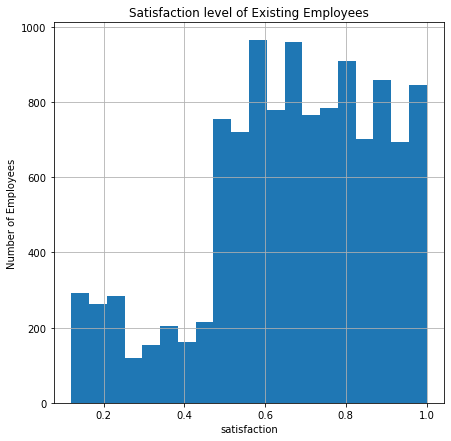

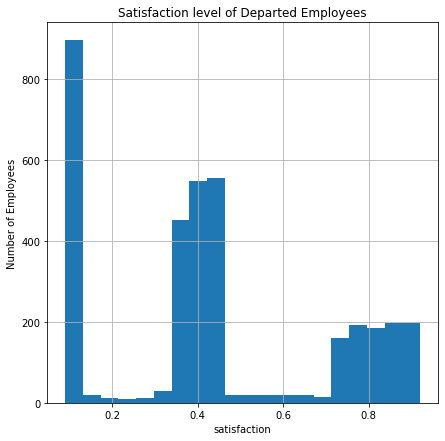

In [12]:
#plot histogram for satisfaction level
plt.figure(figsize=(7,7))
existing_df['satisfaction_level'].hist(bins=20)
plt.title("Satisfaction level of Existing Employees")
plt.xlabel("satisfaction")
plt.ylabel("Number of Employees")
plt.show()

plt.figure(figsize=(7,7))
departed_df['satisfaction_level'].hist(bins=20)
plt.title("Satisfaction level of Departed Employees")
plt.xlabel("satisfaction")
plt.ylabel("Number of Employees")
plt.show()


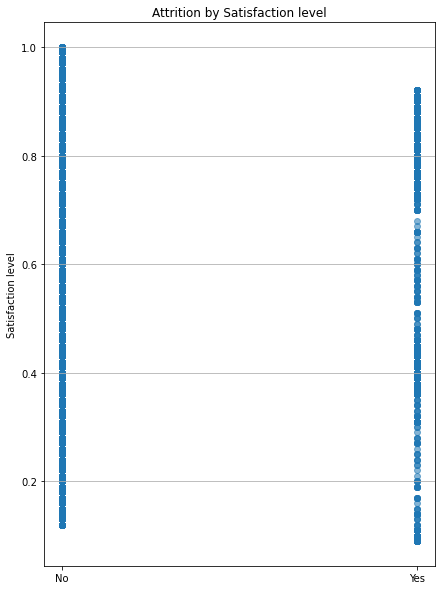

In [13]:
#Explore data for attrition by satisfaction level
plt.figure(figsize=(7,10))
plt.scatter(dataset.attrition,dataset.satisfaction_level, alpha=.55)
plt.title("Attrition by Satisfaction level")
plt.ylabel("Satisfaction level")
plt.grid(b=True, which='major',axis='y')
plt.show()

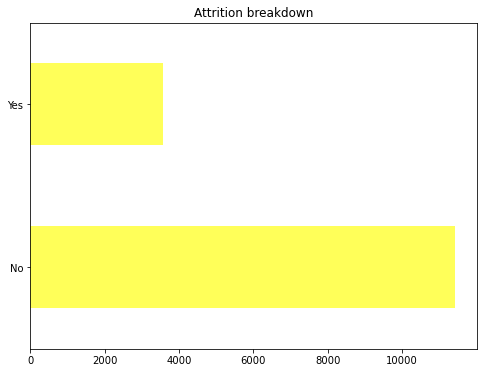

In [14]:
#explore data for left employees breakdown
plt.figure(figsize=(8,6))
dataset.attrition.value_counts().plot(kind='barh',color='yellow',alpha=.65)
plt.title("Attrition breakdown")
plt.show()

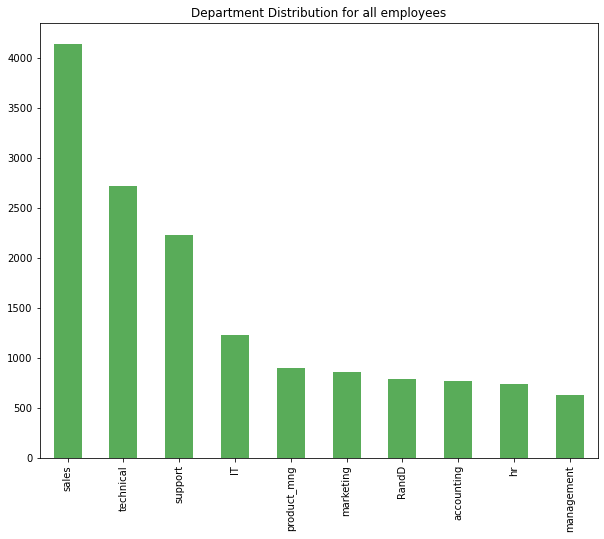

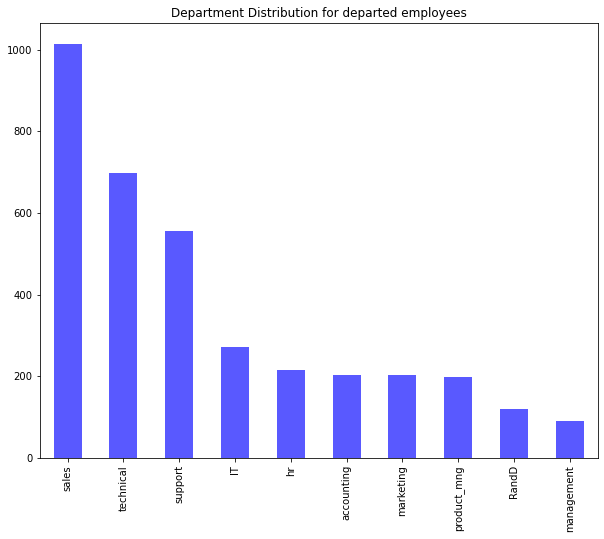

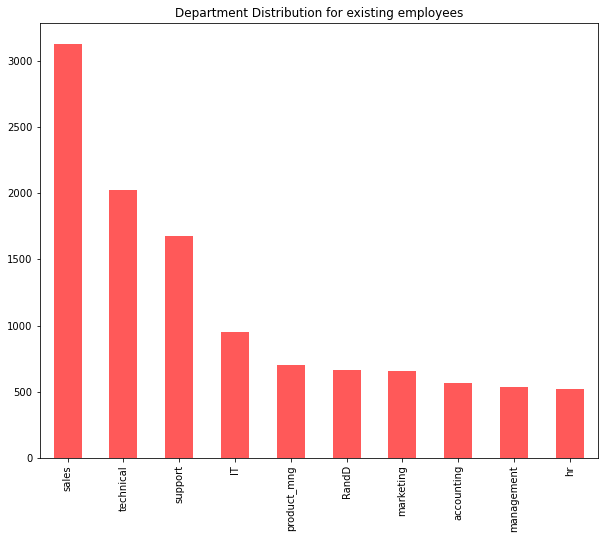

In [15]:
#explore data for Education Field distribution
plt.figure(figsize=(10,8))
dataset.dept.value_counts().plot(kind='bar',color='g',alpha=.65)
plt.title("Department Distribution for all employees")
plt.show()

plt.figure(figsize=(10,8))
departed_df.dept.value_counts().plot(kind='bar',color='b',alpha=.65)
plt.title("Department Distribution for departed employees")
plt.show()

plt.figure(figsize=(10,8))
existing_df.dept.value_counts().plot(kind='bar',color='r',alpha=.65)
plt.title("Department Distribution for existing employees")
plt.show()

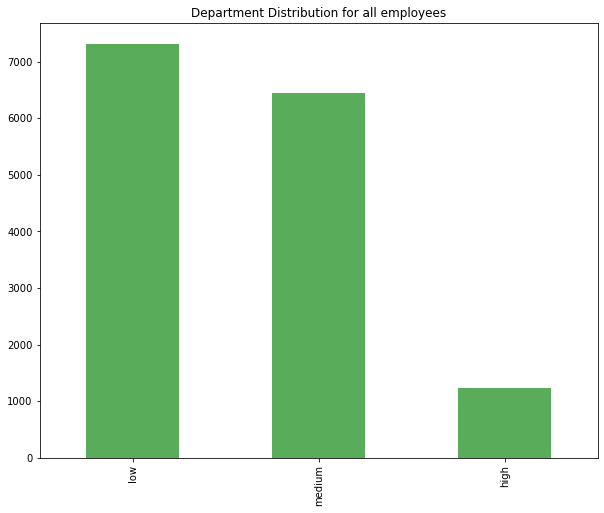

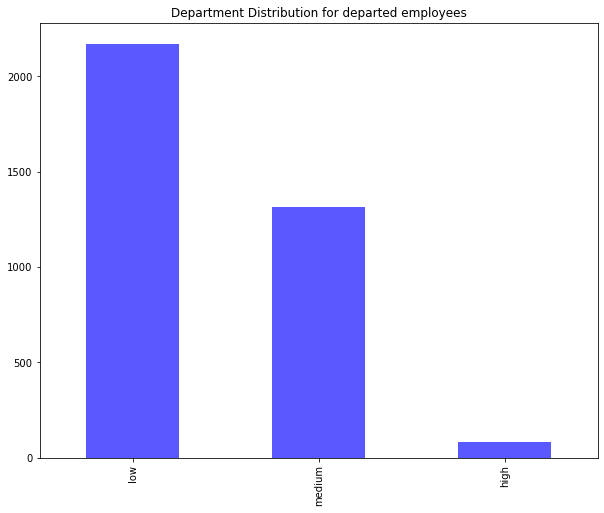

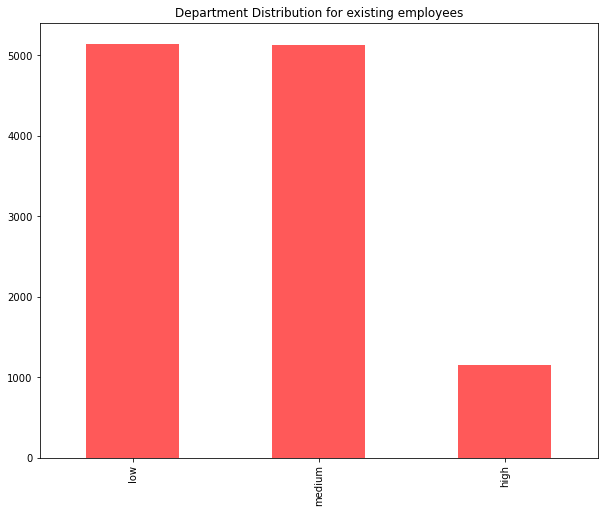

In [16]:
#explore data for Salary distribution
plt.figure(figsize=(10,8))
dataset.salary.value_counts().plot(kind='bar',color='g',alpha=.65)
plt.title("Department Distribution for all employees")
plt.show()

plt.figure(figsize=(10,8))
departed_df.salary.value_counts().plot(kind='bar',color='b',alpha=.65)
plt.title("Department Distribution for departed employees")
plt.show()

plt.figure(figsize=(10,8))
existing_df.salary.value_counts().plot(kind='bar',color='r',alpha=.65)
plt.title("Department Distribution for existing employees")
plt.show()

In [17]:
dataset['attrition'].replace('Yes',1, inplace=True)
dataset['attrition'].replace('No',0, inplace=True)

In [18]:
X = dataset.drop(['attrition'], axis=1)
X.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [19]:
Y = dataset['attrition']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: attrition, dtype: int64

In [20]:
dataset['salary'].replace('low',1, inplace=True)
dataset['salary'].replace('medium',2, inplace=True)
dataset['salary'].replace('high',3, inplace=True)

In [21]:
dataset['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [22]:
dataset['dept'].replace('sales',1, inplace=True)
dataset['dept'].replace('technical',2, inplace=True)
dataset['dept'].replace('support',3, inplace=True)
dataset['dept'].replace('IT',4, inplace=True)
dataset['dept'].replace('hr',5, inplace=True)
dataset['dept'].replace('accounting',6, inplace=True)
dataset['dept'].replace('marketing',7, inplace=True)
dataset['dept'].replace('product_mng',8, inplace=True)
dataset['dept'].replace('RandD',9, inplace=True)
dataset['dept'].replace('management',10, inplace=True)

In [23]:
dataset['dept'].value_counts()

1     4140
2     2720
3     2229
4     1227
8      902
7      858
9      787
6      767
5      739
10     630
Name: dept, dtype: int64

In [24]:
x = dataset.select_dtypes(include=['int64'])
x.dtypes

Emp ID                   int64
number_project           int64
average_montly_hours     int64
time_spend_company       int64
Work_accident            int64
promotion_last_5years    int64
dept                     int64
salary                   int64
attrition                int64
dtype: object

In [25]:
x.columns

Index(['Emp ID', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years', 'dept',
       'salary', 'attrition'],
      dtype='object')

In [26]:
y = dataset['attrition']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: attrition, dtype: int64

In [27]:
y, x = dmatrices('attrition ~ number_project + average_montly_hours + time_spend_company + Work_accident + Work_accident + promotion_last_5years + dept + salary', dataset, return_type="dataframe")
print(x.columns)

Index(['Intercept', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years', 'dept',
       'salary'],
      dtype='object')


In [28]:
y = np.ravel(y)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x,y)

model.score(x,y) #check accuracy on training set

0.7523834922328155

In [30]:
y.mean()

0.2380825388359224

In [31]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [32]:
predicted = model2.predict(X_test)
print(predicted)

[0. 1. 0. ... 0. 0. 0.]


In [33]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.75739174 0.24260826]
 [0.45565247 0.54434753]
 [0.69444368 0.30555632]
 ...
 [0.95103237 0.04896763]
 [0.78688158 0.21311842]
 [0.97010582 0.02989418]]


In [34]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7517777777777778
0.6983846518095913


In [35]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[3350   79]
 [1038   33]]
              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      3429
         1.0       0.29      0.03      0.06      1071

    accuracy                           0.75      4500
   macro avg       0.53      0.50      0.46      4500
weighted avg       0.65      0.75      0.67      4500



In [36]:
print (X_train)

       Intercept  number_project  average_montly_hours  time_spend_company  \
10438        1.0             3.0                 269.0                 8.0   
9236         1.0             3.0                 207.0                 2.0   
818          1.0             2.0                 101.0                 6.0   
11503        1.0             7.0                 306.0                 4.0   
11721        1.0             6.0                 308.0                 4.0   
...          ...             ...                   ...                 ...   
13123        1.0             5.0                 272.0                 5.0   
3264         1.0             5.0                 224.0                 2.0   
9845         1.0             5.0                 160.0                 3.0   
10799        1.0             3.0                 151.0                 2.0   
2732         1.0             4.0                 178.0                 3.0   

       Work_accident  promotion_last_5years  dept  salary  
104

In [38]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0, 12.0]]
print(model.predict_proba(kk))

[[0. 1.]]
